<a href="https://colab.research.google.com/github/saravanamuthu1/salesprediction/blob/main/salesprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! git clone https://github.com/rakeshramakrshnan/SalesPredictionUsingLinearRegression.git

Cloning into 'SalesPredictionUsingLinearRegression'...
remote: Enumerating objects: 32, done.
remote: Total 32 (delta 0), reused 0 (delta 0), pack-reused 32
Unpacking objects: 100% (32/32), done.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train_data = pd.read_csv("/content/SalesPredictionUsingLinearRegression/bin/Source/Train_Data.csv")
test_data  = pd.read_csv("/content/SalesPredictionUsingLinearRegression/bin/Source/Test_Data.csv")

In [4]:
train_data.head(5)

,Product_Id,Product_Catogory,Product_Price,Product_Size,Product_Health_Info,Branch_Id,Branch_Year,Product_Display_Area,Branch_Area,Branch_Location_Type,Branch_Type,Branch_Product_Sales
0,FDA15,Dairy,249.8092,9.30,Low Fat,BRN049,1999,0.016047,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,Soft Drinks,48.2692,5.92,Regular,BRN018,2009,0.019278,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,Meat,141.6180,17.50,Low Fat,BRN049,1999,0.016760,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,Fruits and Vegetables,182.0950,19.20,Regular,BRN010,1998,0.000000,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,Household,53.8614,8.93,Low Fat,BRN013,1987,0.000000,High,Tier 3,Supermarket Type1,994.7052


In [5]:
train_data.columns

Index(['Product_Id', 'Product_Catogory', 'Product_Price', 'Product_Size',
       'Product_Health_Info', 'Branch_Id', 'Branch_Year',
       'Product_Display_Area', 'Branch_Area', 'Branch_Location_Type',
       'Branch_Type', 'Branch_Product_Sales'],
      dtype='object')

In [6]:
train_data['source']= 'train'
test_data['source']= 'test'

In [7]:
test_data

,Product_Id,Product_Catogory,Product_Price,Product_Size,Product_Health_Info,Branch_Id,Branch_Year,Product_Display_Area,Branch_Area,Branch_Location_Type,Branch_Type,source
0,FDW58,Snack Foods,107.8622,20.750,Low Fat,BRN049,1999,0.007565,Medium,Tier 1,Supermarket Type1,test
1,FDW14,Dairy,87.3198,8.300,reg,BRN017,2007,0.038428,NaN,Tier 2,Supermarket Type1,test
2,NCN55,Others,241.7538,14.600,Low Fat,BRN010,1998,0.099575,NaN,Tier 3,Grocery Store,test
3,FDQ58,Snack Foods,155.0340,7.315,Low Fat,BRN017,2007,0.015388,NaN,Tier 2,Supermarket Type1,test
4,FDY38,Dairy,234.2300,NaN,Regular,BRN027,1985,0.118599,Medium,Tier 3,Supermarket Type3,test
...,...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,Snack Foods,141.3154,10.500,Regular,BRN046,1997,0.013496,Small,Tier 1,Supermarket Type1,test
5677,FDD47,Starchy Foods,169.1448,7.600,Regular,BRN018,2009,0.142991,Medium,Tier 3,Supermarket Type2,test
5678,NCO17,Health and Hygiene,118.7440,10.000,Low Fat,BRN045,2002,0.073529,NaN,Tier 2,Supermarket Type1,test
5679,FDJ26,Canned,214.6218,15.300,Regular,BRN017,2007,0.000000,NaN,Tier 2,Supermarket Type1,test


In [8]:
df= pd.concat([train_data,test_data])
print("train_shape", train_data.shape)
print("test_shape", test_data.shape)
print("data_shape", df.shape)

train_shape (8523, 13)
test_shape (5681, 12)
data_shape (14204, 13)


In [9]:
df.columns

Index(['Product_Id', 'Product_Catogory', 'Product_Price', 'Product_Size',
       'Product_Health_Info', 'Branch_Id', 'Branch_Year',
       'Product_Display_Area', 'Branch_Area', 'Branch_Location_Type',
       'Branch_Type', 'Branch_Product_Sales', 'source'],
      dtype='object')

In [10]:
Product_List=df.Product_Catogory.unique()

In [11]:
data_check = df.apply(lambda x: sum(x.isnull()))



In [12]:
data_check

Product_Id                 0
Product_Catogory           0
Product_Price              0
Product_Size            2439
Product_Health_Info        0
Branch_Id                  0
Branch_Year                0
Product_Display_Area       0
Branch_Area             4016
Branch_Location_Type       0
Branch_Type                0
Branch_Product_Sales    5681
source                     0
dtype: int64

In [15]:
data_unique = df.apply(lambda x: len(x.unique()))
print("The unique values in data are as follows")
print(data_unique)
print("\n")

The unique values in data are as follows
Product_Id               1559
Product_Catogory           16
Product_Price            8052
Product_Size              416
Product_Health_Info         5
Branch_Id                  10
Branch_Year                 9
Product_Display_Area    13006
Branch_Area                 4
Branch_Location_Type        3
Branch_Type                 4
Branch_Product_Sales     3494
source                      2
dtype: int64




In [17]:
categorical_columns = [x for x in df.dtypes.index if df.dtypes[x]=='object']

In [18]:
categorical_columns = [x for x in categorical_columns if x not in ['Product_Id','Branch_Id','source']]

In [20]:
for col in categorical_columns:
    print ('\nFrequency of Categories for variable %s'%col)
    print (df[col].value_counts())



Frequency of Categories for variable Product_Catogory
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Product_Catogory, dtype: int64

Frequency of Categories for variable Product_Health_Info
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Product_Health_Info, dtype: int64

Frequency of Categories for variable Branch_Area
Medium    4655
Small     3980
High      1553
Name: Branch_Area, dtype: int64

Frequency of Categories for variable Branch_Location_Type
Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Branch_Locati

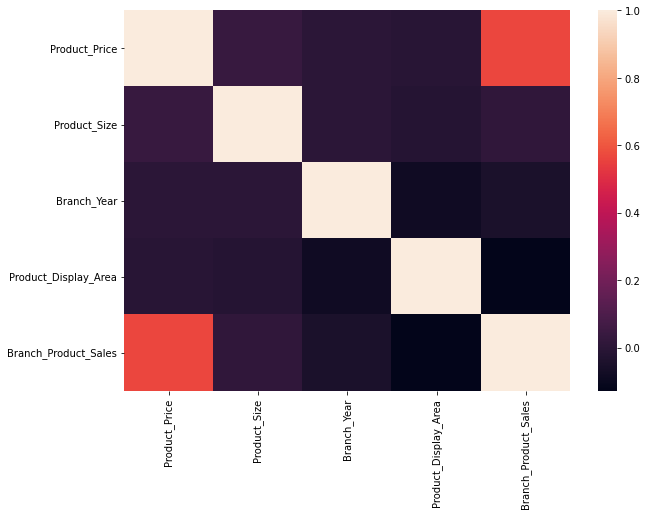

In [23]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr())

In [24]:
product_avg_weight = df.pivot_table(values='Product_Size', index='Product_Id')

In [26]:
miss_bool = df['Product_Size'].isnull()

In [27]:
print ('Orignal #missing: %d'% sum(miss_bool))
df.loc[miss_bool, 'Prodduct_Size'] = df.loc[miss_bool, 'Product_Id'].apply(lambda x: product_avg_weight.loc[x])
print ('Final #missing: %d'% sum(df['Product_Size'].isnull()))

Orignal #missing: 2439
Final #missing: 2439


In [29]:
from scipy.stats import mode

In [30]:
Branch_Area_mode = df.pivot_table(values='Branch_Area', columns='Branch_Type',aggfunc=(lambda x:mode(x).mode[0]) )
print ('Mode for each Outlet_Type:')
print (Branch_Area_mode)


Mode for each Outlet_Type:
Branch_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Branch_Area         Small             Small            Medium   

Branch_Type Supermarket Type3  
Branch_Area            Medium  


In [31]:
miss_bool = df['Branch_Area'].isnull()

# Impute data and check #missing values before and after imputation to confirm
print ('\nOrignal #missing: %d'% sum(miss_bool))
df.loc[miss_bool,'Branch_Area'] = df.loc[miss_bool,'Branch_Type'].apply(lambda x: Branch_Area_mode[x])
df.dropna(subset=['Branch_Area']).pivot_table(values='Branch_Area', columns='Branch_Type',aggfunc=(lambda x:mode(x.astype('str')).mode[0]), dropna=True)
print ('Final #missing: %d'%sum(df['Branch_Area'].isnull()))


Orignal #missing: 4016
Final #missing: 0


In [32]:
target = 'Branch_Product_Sales'
IDcol = ['Product_Id','Branch_Id']

In [40]:
def modelfit(alg, dtrain, dtest, predictors, target, IDcol):
    # Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain[target])

    # Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])

    # Perform cross-validation:
    cv_score = cross_val_score(alg, dtrain[predictors], dtrain[target], cv=20, scoring='mean_squared_error')
    cv_score = np.sqrt(np.abs(cv_score))

    # Print model report:
    print ("\nModel Report")
    print ("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(dtrain[target].values, dtrain_predictions)))
    print ("CV Score : Mean - {:.4g} | Std - {:.4g} | Min - {:.4g} | Max - {:.4g}".format(np.mean(cv_score), np.std(cv_score), np.min(cv_score), np.max(cv_score)))

    # Predict on testing data:
    dtest[target] = alg.predict(dtest[predictors])

    # Export submission file:
    IDcol.append(target)
    submission = pd.DataFrame({ x: dtest[x] for x in IDcol})
    #submission.to_csv(filename, index=False)

    # plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)

    plt.plot(IDcol, target)
    plt.xlabel('Value of target')
    plt.ylabel('Cross-Validated Accuracy')
    ax = plt.subplot()
    plt.show()

In [41]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [42]:
predictors = [x for x in train_data.columns if x not in [target]+IDcol]
print (predictors)
alg1 = LinearRegression(normalize=True)
modelfit(alg1, train_data, test_data, predictors, target, IDcol)
coef1 = pd.Series(alg1.coef_, predictors).sort_values()
coef1.plot(kind='bar', title='Model Coefficients')

# Ridge regression
predictors = [x for x in train_data.columns if x not in [target]+IDcol]
alg2 = Ridge(alpha=0.05,normalize=True)
modelfit(alg2, train_data, test_data, predictors, target, IDcol, 'alg2.csv')
coef2 = pd.Series(alg2.coef_, predictors).sort_values()
coef2.plot(kind='bar', title='Model Coefficients')

['Product_Catogory', 'Product_Price', 'Product_Size', 'Product_Health_Info', 'Branch_Year', 'Product_Display_Area', 'Branch_Area', 'Branch_Location_Type', 'Branch_Type', 'source']


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


ValueError: ignored